<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Lab: Matplotlib

O principal objetivo desse lab é você entender como funciona a construção em camadas do `Matplotlib`, e como empregar os modos `script layer` e `artist layer` para produzir múltiplos gráficos em uma figura.

<br>

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

* Capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

* https://matplotlib.org/

* https://matplotlib.org/stable/tutorials/index.html

* https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


# Exercício 1 `plt.plot()`, function.

Produza um gráfico de linha da função $tanh(x)$ para $x \in [-10,10]$. 

1. Inclua um título com a função
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

<function matplotlib.pyplot.show(close=None, block=None)>

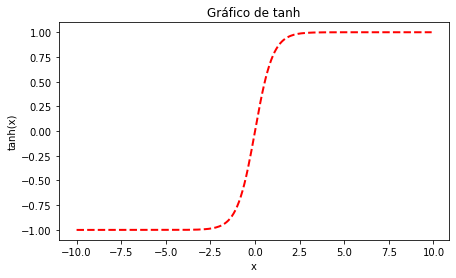

In [2]:
# Seu código
x = np.arange(-10,10,0.1)
y = np.tanh(x)

plt.figure(figsize=(7,4))

plt.title('Gráfico de tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.plot(x, y, color='red', linestyle='dashed', lw=2)
plt.show

# Exercício 2 `plt.plot()`, random data.

Produza um gráfico a partir do dataframe abaixo. 

1. Inclua um título 
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

In [3]:
df = pd.DataFrame()
df['x-values'] = np.arange(0,10,0.01)
df['y-values'] = np.random.sample(len(df))
df.head()


,x-values,y-values
0,0.00,0.321074
1,0.01,0.445011
2,0.02,0.684695
3,0.03,0.596509
4,0.04,0.022204


<function matplotlib.pyplot.show(close=None, block=None)>

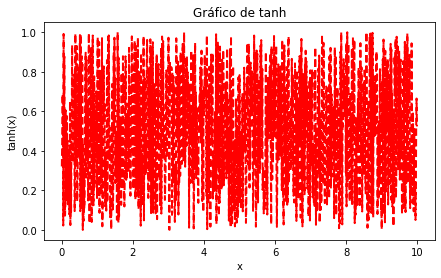

In [4]:
# Seu código
plt.figure(figsize=(7,4))

plt.title('Gráfico de tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.plot(df['x-values'], df['y-values'], color='red', linestyle='dashed', lw=2)
plt.show

# **CASE: fmri**

Nos exercícios a seguir partimos da seguinte base de dados:

In [5]:
df = sns.load_dataset('fmri')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Pré Exercício!

Explore a base antes de prosseguir. **Ordene os dados no tempo** antes de seguir.

Dica: `df.sort_values()`

In [6]:
# Seu código
df = df.sort_values(by='timepoint')

In [7]:
#@markdown This cell is configured to not execute. Do not change this.
%%script echo skipping
df = df.sort_values('timepoint')
df.head()

np.random.seed(1)
r = np.random.randint(0,len(df.subject.unique())+1,len(df.subject.unique()))
s = np.sort( df.subject.unique() )
r = s[r]

for i in range(len(s)):
  df.subject = df.subject.replace(r[i],'x')
  df.subject = df.subject.replace(s[i],r[i])
  df.subject = df.subject.replace('x',s[i])

df.to_csv('fmri.csv',index=None)

df = pd.read_csv('fmri.csv')
# df.head()


skipping


# Exercício 3

Produza um gráfico como abaixo para o sujeito `s0`. Observe todos os elementos do gráfico como a seleção dos dados (sujeito `s0`, região `parietal` e evento de `stim`), títulos e rótulos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_3.png)

Q. Para o sujeito s0, os valores de sinal encontram-se melhor em que intervalo de valores?

<function matplotlib.pyplot.show(close=None, block=None)>

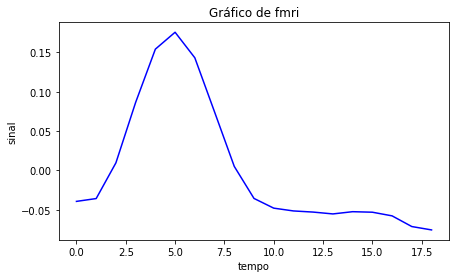

In [8]:
# Seu código
df_temp = df[(df['subject'] == 's0') & (df['region'] == 'parietal') & (df['event'] == 'stim')]
plt.figure(figsize=(7,4))

plt.title('Gráfico de fmri')
plt.xlabel('tempo')
plt.ylabel('sinal')
plt.plot(df_temp['timepoint'], df_temp['signal'], color='b', linestyle='solid')
plt.show

# Exercício 4

Produza um gráfico como abaixo para o sujeito `s0`. Observe todos os elementos do gráfico como a seleção dos dados (sujeito `s0`, região `parietal` e eventos de `stim` e `cue`), títulos e rótulos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_4.png)


Q. Para o sujeito s0, os valores de repouso (cue) apresentam uma variação menor que a dos estímulos? 

In [19]:
def get_dfs_from_subject(subject: str):
  df_temp_s = df[(df['subject'] == subject) & (df['region'] == 'parietal')]
  df_s_stim = df_temp_s[df_temp_s['event'] == 'stim']
  df_s_cue = df_temp_s[df_temp_s['event'] == 'cue']
  return df_s_stim, df_s_cue

<function matplotlib.pyplot.show(close=None, block=None)>

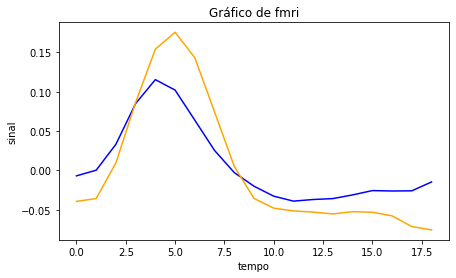

In [20]:
# Seu código
# df_s0 = df[(df['subject'] == 's0') & (df['region'] == 'parietal')]
# df_s0_stim = df_s0[df_s0['event'] == 'stim']
# df_s0_cue = df_s0[df_s0['event'] == 'cue']
df_s0_stim, df_s0_cue = get_dfs_from_subject('s0')

plt.figure(figsize=(7,4))

plt.title('Gráfico de fmri')
plt.xlabel('tempo')
plt.ylabel('sinal')
plt.plot(df_s0_cue['timepoint'], df_s0_cue['signal'], color='b', linestyle='solid')
plt.plot(df_s0_stim['timepoint'], df_s0_stim['signal'], color='orange', linestyle='solid')
plt.show

# Exercício 5 `plt.subplot(nrow, ncol, nr)`

Produza um gráfico como abaixo para os sujeitos `s0` e `s1`, em uma mesma figura empregando o modo `script layer`. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_5.png)

Q. Para o sujeito s1, os sinais apresentam uma variação menor, aproximadamente igual ou maior com relação ao sujeito s0? 

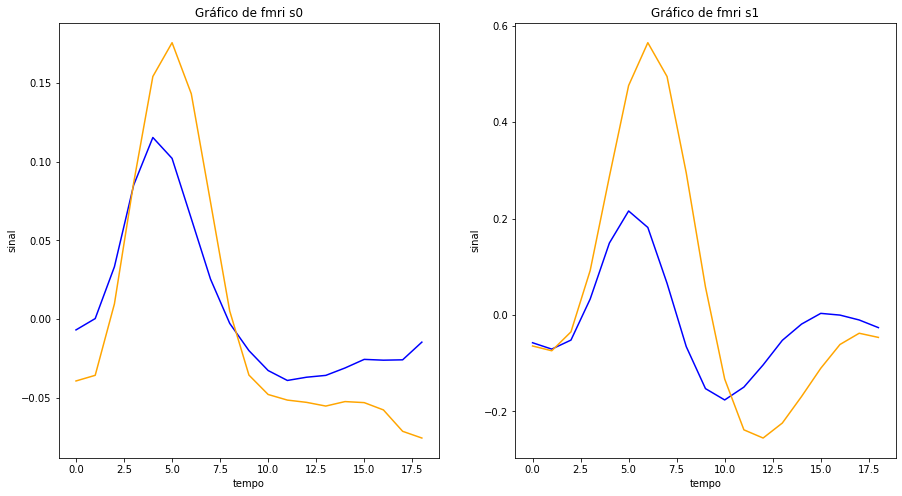

In [21]:
# Seu código
#df_s0 já existe
# df_s1 = df[(df['subject'] == 's1') & (df['region'] == 'parietal')]
# df_s1_stim = df_s1[df_s1['event'] == 'stim']
# df_s1_cue = df_s1[df_s1['event'] == 'cue']
df_s1_stim, df_s1_cue = get_dfs_from_subject('s1')

plt.figure(figsize=(15,8))

plt.subplot(121)
plt.title('Gráfico de fmri s0')
plt.xlabel('tempo')
plt.ylabel('sinal')
plt.plot(df_s0_cue['timepoint'], df_s0_cue['signal'], color='b', linestyle='solid')
plt.plot(df_s0_stim['timepoint'], df_s0_stim['signal'], color='orange', linestyle='solid')

plt.subplot(122)
plt.title('Gráfico de fmri s1')
plt.xlabel('tempo')
plt.ylabel('sinal')
plt.plot(df_s1_cue['timepoint'], df_s1_cue['signal'], color='b', linestyle='solid')
plt.plot(df_s1_stim['timepoint'], df_s1_stim['signal'], color='orange', linestyle='solid')

plt.show()

# Exercício 6 `plt.subplots(nrow,ncol,...)` `ax[i,<j>]`

Produza um gráfico como abaixo para os sujeitos `s0` e `s1`, em uma mesma figura empregando, agora empregando o modo `artist layer`. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_6.png)

Q. Qual a dimensão do ax criado? (dica: empregue ax.shape) 

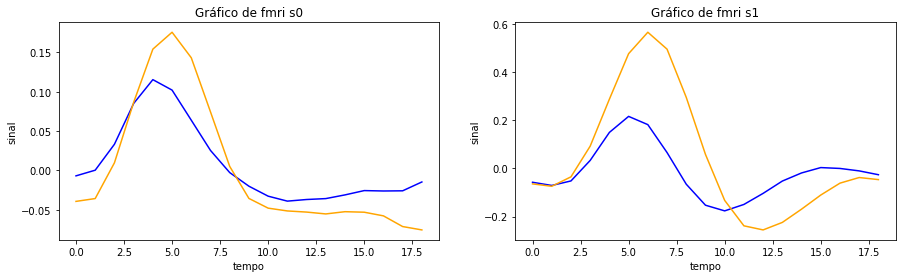

In [11]:
# Seu código


fig, ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title('Gráfico de fmri s0')
ax[0].set_xlabel('tempo')
ax[0].set_ylabel('sinal')
ax[0].plot(df_s0_cue['timepoint'], df_s0_cue['signal'], color='b', linestyle='solid')
ax[0].plot(df_s0_stim['timepoint'], df_s0_stim['signal'], color='orange', linestyle='solid')

ax[1].set_title('Gráfico de fmri s1')
ax[1].set_xlabel('tempo')
ax[1].set_ylabel('sinal')
ax[1].plot(df_s1_cue['timepoint'], df_s1_cue['signal'], color='b', linestyle='solid')
ax[1].plot(df_s1_stim['timepoint'], df_s1_stim['signal'], color='orange', linestyle='solid')

plt.show()

In [12]:
ax.shape

(2,)

# Exercício 7 `sharex, sharey`

Produza um gráfico como abaixo agora para os sujeitos `s0` a `s3`, em uma mesma figura empregando empregando o modo `artist layer`. Verifique no comando `subplots()` como compartilhar os eixos. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_7.png)

Q. Quais sujeitos apresentam sinais mais intensos de estímulos?  

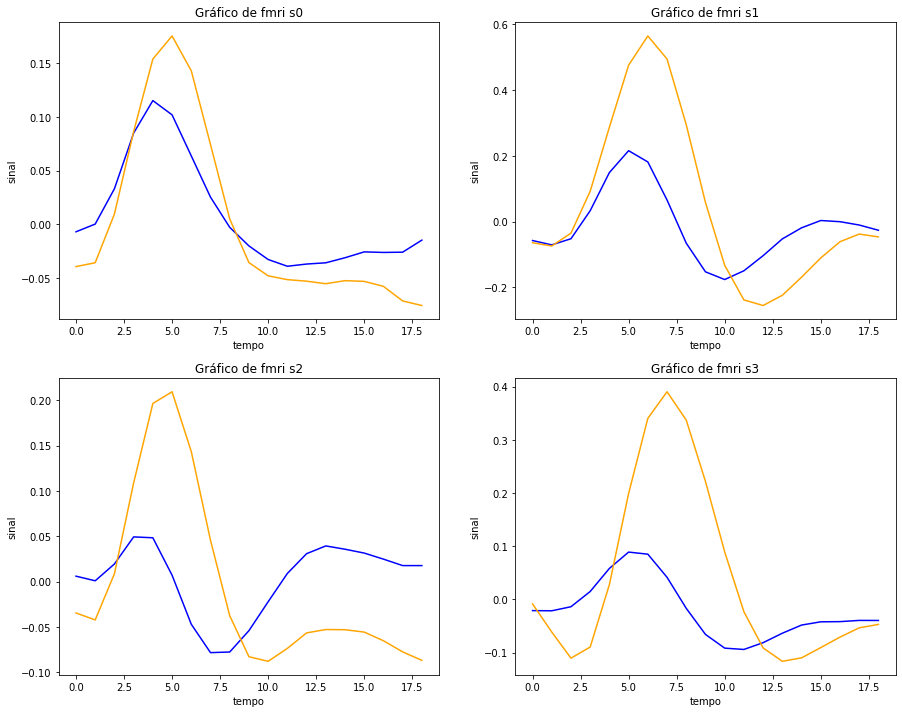

In [22]:
# Seu código
# df_s2 = df[(df['subject'] == 's2') & (df['region'] == 'parietal')]
# df_s2_stim = df_s2[df_s2['event'] == 'stim']
# df_s2_cue = df_s2[df_s2['event'] == 'cue']

# df_s3 = df[(df['subject'] == 's3') & (df['region'] == 'parietal')]
# df_s3_stim = df_s3[df_s3['event'] == 'stim']
# df_s3_cue = df_s3[df_s3['event'] == 'cue']

df_s2_stim, df_s2_cue = get_dfs_from_subject('s2')
df_s3_stim, df_s3_cue = get_dfs_from_subject('s3')

fig, ax = plt.subplots(2,2,figsize=(15,12))
ax[0][0].set_title('Gráfico de fmri s0')
ax[0][0].set_xlabel('tempo')
ax[0][0].set_ylabel('sinal')
ax[0][0].plot(df_s0_cue['timepoint'], df_s0_cue['signal'], color='b', linestyle='solid')
ax[0][0].plot(df_s0_stim['timepoint'], df_s0_stim['signal'], color='orange', linestyle='solid')

ax[0][1].set_title('Gráfico de fmri s1')
ax[0][1].set_xlabel('tempo')
ax[0][1].set_ylabel('sinal')
ax[0][1].plot(df_s1_cue['timepoint'], df_s1_cue['signal'], color='b', linestyle='solid')
ax[0][1].plot(df_s1_stim['timepoint'], df_s1_stim['signal'], color='orange', linestyle='solid')

ax[1][0].set_title('Gráfico de fmri s2')
ax[1][0].set_xlabel('tempo')
ax[1][0].set_ylabel('sinal')
ax[1][0].plot(df_s2_cue['timepoint'], df_s2_cue['signal'], color='b', linestyle='solid')
ax[1][0].plot(df_s2_stim['timepoint'], df_s2_stim['signal'], color='orange', linestyle='solid')

ax[1][1].set_title('Gráfico de fmri s3')
ax[1][1].set_xlabel('tempo')
ax[1][1].set_ylabel('sinal')
ax[1][1].plot(df_s3_cue['timepoint'], df_s3_cue['signal'], color='b', linestyle='solid')
ax[1][1].plot(df_s3_stim['timepoint'], df_s3_stim['signal'], color='orange', linestyle='solid')

plt.show()